## Домашнее задание №3 (курс "Практикум по программированию на языке Python")

### Выполнил: <font color='red'>Крейнин Матвей Вадимович, МФТИ, ФПМИ</font>

### Тема: Основы анализа данных и машинного обучения

#### Преподаватель: Мурат Апишев (mel-lain@yandex.ru)

**Выдана**:   27 марта 2023

**Дедлайн**:   21:00 9 апреля 2023

**Среда выполнения**: Jupyter Notebook (Python 3.7+)

#### Правила:

Результат выполнения задания - Jupyter Notebook с кодом и подробными ответами в случае теоретических вопросов. __Максимальное число баллов за задание - 20__.

Все ячейки должны быть "выполненными", при этом результат должен воспроизводиться при проверке (на Python 3.7). Если какой-то код не был запущен или отрабатывает с ошибками, то пункт не засчитывается. Задание, сданное после дедлайна, _не принимается_. Можно отправить недоделанное задание, выполненные пункты будут оценены.

Готовое задание отправляется на почту преподавателя.

Задание выполняется самостоятельно. Если какие-то студенты будут уличены в списывании, все они автоматически получат за эту работу 0 баллов. Если вы нашли в Интернете какой-то специфичный код, который собираетесь заимствовать, обязательно укажите это в задании - наверняка вы не единственный, кто найдёт и использует эту информацию.

Удалять фрагменты формулировок заданий запрещается.

#### Постановка задачи:

- В данной работе нужно решить ряд задач c использованием библиотек для обработки данных и машинного обучения, а также дать ичерпывающие ответы на поставленные вопросы.
- В задачах 1-3 запрещается использовать циклы, генераторы списков и списковые включения, а также функции высшего порядка, необходимо написать тесты, проверяющие работу решения в обычных и крайних случаях.
- Даже если это не указано явно в требованиях, код должен быть по возможности неизбыточным, работать с разумной сложностью и объёмом потребялемой памяти, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Результирующий код должен быть читаемым, с единой системой отступов и адеквантными названиями переменных, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Везде, где это требуется, должны быть отрисованы необходимые графики и даны комментарии и выводы.

Вопросы:
1. Является ли extend генератором списка?
2. В последней задаче нужно двигать всю строчку или вставить два пробела?

__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [112]:
import numpy as np

In [113]:
def task_1(arr):
    return np.amin(arr) > 0

In [114]:
arr = np.array([0, 1, 2, 3])
print(f"Should be False | result = {task_1(arr)}")
arr = np.array([-1, 1, 2, 3])
print(f"Should be False | result = {task_1(arr)}")
arr = np.array([10, 1, 2, 3])
print(f"Should be True  | result = {task_1(arr)}")

Should be False | result = False
Should be False | result = False
Should be True  | result = True


__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [115]:
def task_2(arr, n):
    return np.repeat(arr, n)

In [116]:
vec = [1, 2, 3]
print(f"Should be [1, 1, 1, 2, 2, 2, 3, 3, 3] | result = {task_2(vec, 3)}")
vec1 = np.array(vec)
print(f"Should be [1, 1, 1, 2, 2, 2, 3, 3, 3] | result = {task_2(vec1, 3)}")

Should be [1, 1, 1, 2, 2, 2, 3, 3, 3] | result = [1 1 1 2 2 2 3 3 3]
Should be [1, 1, 1, 2, 2, 2, 3, 3, 3] | result = [1 1 1 2 2 2 3 3 3]


__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [117]:
def task_3(V, v):
    tmp = np.append([0], np.cumsum(v))
    return list(map(lambda x: sum(V[tmp[x - 1]:tmp[x]]), range(1, len(tmp))))

In [118]:
V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
v=[2, 1, 3]
print(task_3(V, v))

[3, 3, 15]


Для решения следующих заданий скачайте набор данных 20 News Group с помощью следующего кода:

In [119]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt

In [120]:

X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')

label_names = pd.DataFrame(columns=['label_name', 'label_id'],
                           data=[(e, i) for i, e in enumerate(list(X_train.target_names))])
data = pd.DataFrame()
data['text'] = X_train.data + X_test.data
data['is_train'] = [True] * len(X_train.data) + [False] * len(X_test.data)
data['label_id'] = list(X_train.target) + list(X_test.target)

__Задание 4 (1 балл):__ Используя возможности библиотеки pandas

- сделайте join таблиц `data` и `label_names`, удалив из итоговой таблицы поле `label_id`
- посчитайте количество обучающих и тестовых данных
- постройте круговую диаграмму, показывающую долю каждого класса в обучающих данных

In [121]:
data['label_name'] = data['label_id'].apply(lambda id: label_names['label_name'][label_names['label_id'].iloc[id]])
data = data.drop(columns='label_id')
data

,text,is_train,label_name
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,sci.space
...,...,...,...
18841,From: richmond@spiff.Princeton.EDU (Stupendous...,False,sci.space
18842,From: smytonj@murr11.alleg.edu (Jim Smyton)\nS...,False,comp.sys.mac.hardware
18843,From: hhenderson@vax.clarku.edu\nSubject: RE: ...,False,rec.sport.baseball
18844,From: b859zam@utarlg.uta.edu \nSubject: INTEL ...,False,misc.forsale


In [122]:
train_size, test_size = data['is_train'].value_counts()
print(f"All data: {train_size + test_size}")
print(f"train size: {train_size}")
print(f"test size: {test_size}")

All data: 18846
train size: 11314
test size: 7532


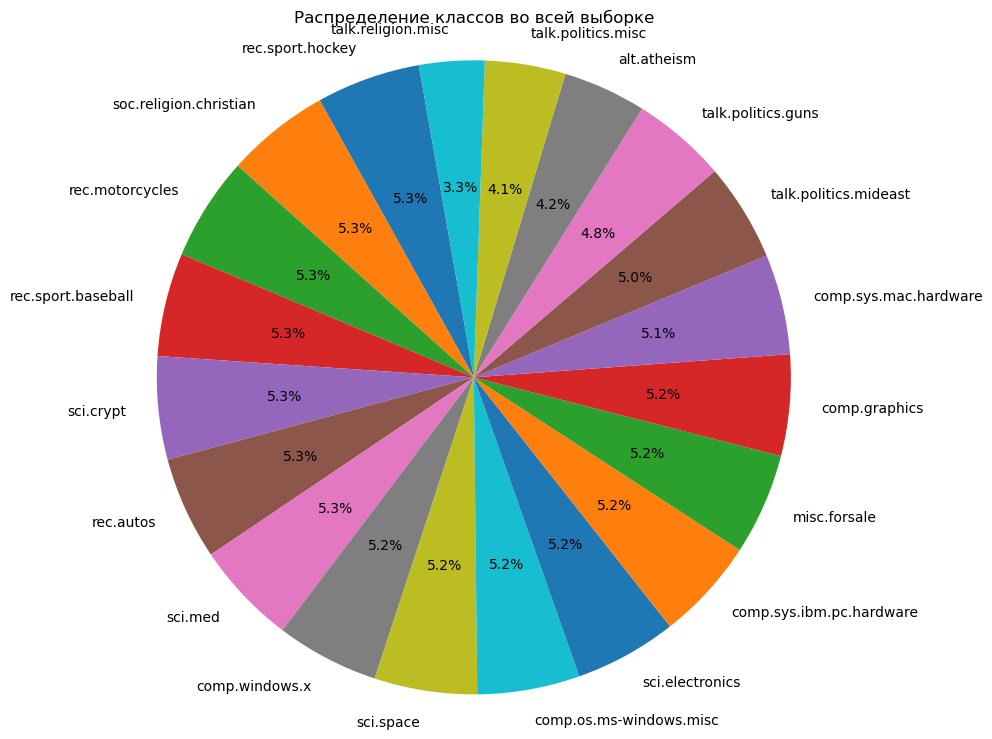

In [123]:
fig, ax = plt.subplots(figsize=(9,9))

x = data['label_name'].value_counts().to_numpy()
labels = data['label_name'].value_counts().index.tolist()
ax.pie(x, labels=labels, autopct='%1.1f%%', shadow=False, startangle=100)
ax.axis('equal')  
ax.set_title("Распределение классов во всей выборке")

plt.show()

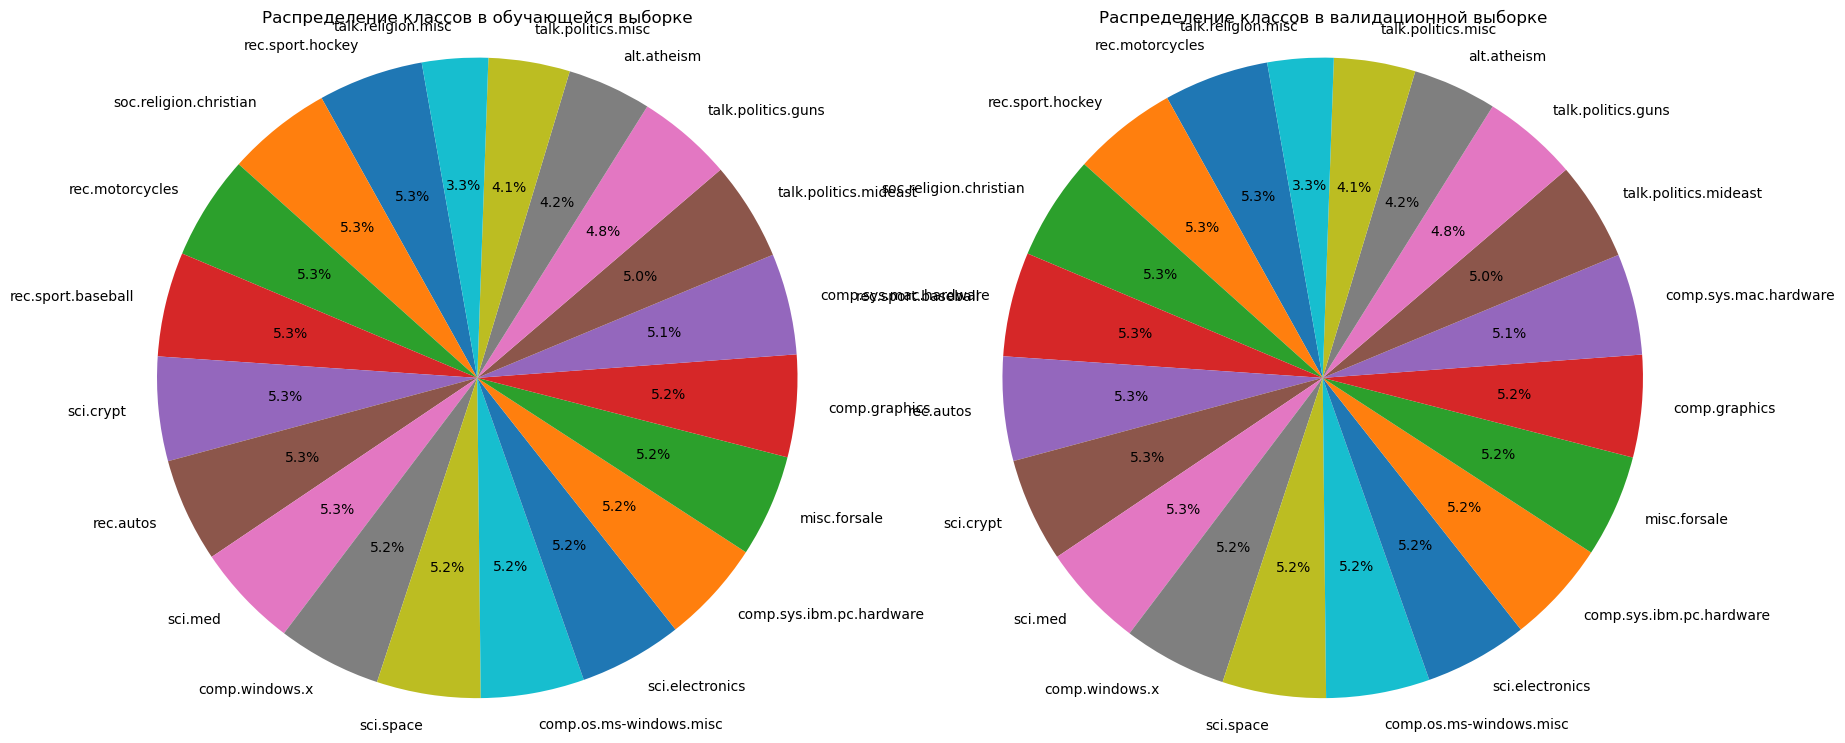

In [124]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,9))
x = data['label_name'][0:11313].value_counts().to_numpy()
labels = data['label_name'][0:11313].value_counts().index.tolist()
ax[0].pie(x, labels=labels, autopct='%1.1f%%', shadow=False, startangle=100)
ax[0].axis('equal')  
ax[0].set_title("Распределение классов в обучающейся выборке")

x = data['label_name'][11313:].value_counts().to_numpy()
labels = data['label_name'][11313:].value_counts().index.tolist()
ax[1].pie(x, labels=labels, autopct='%1.1f%%', shadow=False, startangle=100)
ax[1].axis('equal')  
ax[1].set_title("Распределение классов в валидационной выборке")

plt.show()

__Задание 5 (2 балла):__ Каждый объект представляет собой текст. Чаще всего тексты предобрабатывают перед тем, как пытаться выделять из них признаки. Опишите функцию `preprocess`, которая получает на вход сырой текст и возвращает предобработанный. Примените эту функцию к элементу `text` каждого объекта и результат запишите в столбец `pp_text` (далее под текстом подразумевается именно содержимое этого столбца). За пределами `preprocess` циклами пользоваться запрещено (т.е. предобработка должна применяться средствами DataFrame). Функция должна выполнять следующий набор операций:

- привести текст к нижнему регистру
- заменить все символы '\n', '\t' и '\r' на пробелы
- заменить в тексте все символы, не являющиеся английскими буквами, на пробелы
- сделать split текста по пробелам, удалив все пустые слова
- вернуть получившийся список слов

Для ускорения `preprocess` может использовать внешние переменные, например, скомпилированные регулярные выражения.

In [125]:
def preprocess(text):    
    #text = t.copy
    text = text.replace("\n", " ")
    text = text.replace("\t", " ")
    text = text.replace("\r", " ")
    # replace upper symbols
    for l in range(ord('Z') - ord('A')):
        text = text.replace(chr(l + ord('A')), chr(l + ord('a')))
    for j in range(len(text)):
        if ord('a') > ord(text[j]) or  ord('z') < ord(text[j]):
            text = text.replace(text[j], ' ')
    return [el for el in text.split(' ') if el != '']
    
    
def task_5(data_ar):
    data_ar['pp_text'] = data['text'].apply(lambda txt: preprocess(txt))
    return data_ar

In [126]:
data = task_5(data)
data

,text,is_train,label_name,pp_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,rec.autos,"[from, lerxst, wam, umd, edu, where, s, my, th..."
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,comp.sys.mac.hardware,"[from, guykuo, carson, u, washington, edu, guy..."
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,comp.sys.mac.hardware,"[from, twillis, ec, ecn, purdue, edu, thomas, ..."
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,comp.graphics,"[from, jgreen, amber, joe, green, subject, re,..."
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,sci.space,"[from, jcm, head, cfa, harvard, edu, jonathan,..."
...,...,...,...,...
18841,From: richmond@spiff.Princeton.EDU (Stupendous...,False,sci.space,"[from, richmond, spiff, princeton, edu, stupen..."
18842,From: smytonj@murr11.alleg.edu (Jim Smyton)\nS...,False,comp.sys.mac.hardware,"[from, smytonj, murr, alleg, edu, jim, smyton,..."
18843,From: hhenderson@vax.clarku.edu\nSubject: RE: ...,False,rec.sport.baseball,"[from, hhenderson, vax, clarku, edu, subject, ..."
18844,From: b859zam@utarlg.uta.edu \nSubject: INTEL ...,False,misc.forsale,"[from, b, zam, utarlg, uta, edu, subject, inte..."


__Задание 6 (2 балла):__ Каждое уникальное слово текста представляет собой признак. Посчитайте, сколько в обучающих текстах есть уникальных слов, отобразите гистограмму частот встречаемости слов в обучающей коллекции, 
отсортировав слова по убыванию частоты встречаемости (по оси X идут все слова из словаря коллекции в порядке убывания частоты встречаемости, по оси Y указываются значения частот).

Для уменьшения признакового пространства словарь фильтруют. Удалите из словаря

- все слова, встречающиеся более 9000-х раз
- все слова, встречающиеся менее 3-х раз
- все слова длиной менее 3 символов
- все слова длиной более 20 символов
- все слова, состоящие из одного и того же символа

Профильтруйте обучающую коллекцию по новому словарю и снова посчитайте число уникальных слов в словаре и снова постройте гистограмму частот.

In [127]:
from collections import Counter

vocabulary = Counter()

def task_6(data_ar, vocab):
    for txt in data_ar[data_ar['is_train'] == True]['pp_text'].values:
        vocab.update(txt)
    
    words, number = zip(*vocab.most_common())
    print(f"Кол-во уникальных слов в train: {len(words)}")

    # гистограмма частот
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    ax[0].plot(range(len(number) // 100), number[0:len(number) // 100], label="Кол-во первые 100 слов")
    ax[0].legend()

    check_word = lambda word: len(set(word)) == 1
    for word in list(vocab):
        if vocab[word] < 3 or vocab[word] > 9000 \
            or len(word) > 20 or len(word) < 3 or check_word(word):
            del vocab[word]
    
    # сортировка и разделение на слова и частоты
    words_filter, number_filter = zip(*vocab.most_common())
    print(f"Кол-во уникальных слов в train после фильтрации: {len(words_filter)}")

    # гистограмма частот
    ax[1].plot(range(len(number_filter) // 100), number_filter[0:len(number_filter) // 100], label="Распределение частот первых 100 слов")
    ax[1].legend()
    
    fig.show()
    return vocab

Кол-во уникальных слов в train: 87213
Кол-во уникальных слов в train после фильтрации: 38938
Num of words before filtering: 38938


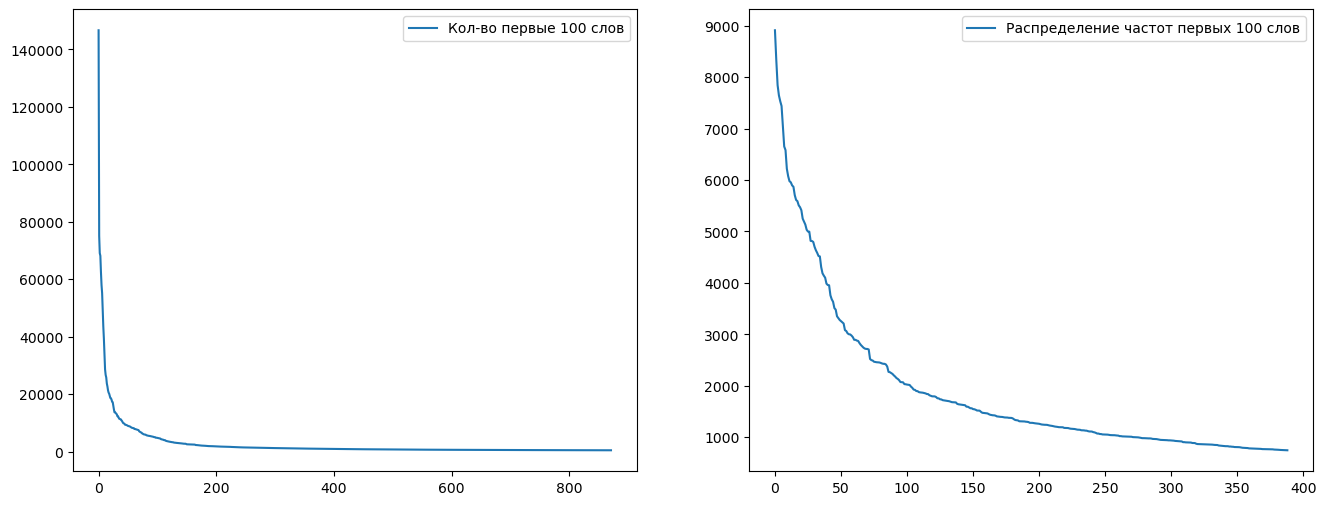

In [128]:
vocabulary = task_6(data, vocabulary)
print(f"Num of words before filtering: {len(vocabulary)}")

__Задание 7 (1.5 балла):__ Для построения моделей данные нужно перевести в числовой вид. Для этого воспользуйтесь представлением "мешка слов", в котором признаками являются слова, а значениями - частоты их встречаемости в документе. Построить представление мешка слов можно с помощью класса CountVectorizer из sklearn. Подготовьте векторизатор, подав ему обучающие текстовые данные из `data` (приведите тексты к формату входа векторизатора) и полученный выше словарь.

Примените полученный векторизатор к обучающим и тестовым данным, на выходе должны получиться два numpy array (первая размерность - число объектов, вторая - число слов в словаре).

In [129]:
from sklearn.feature_extraction.text import CountVectorizer

def task_7(data):
    c_vect = CountVectorizer(vocabulary=vocabulary.keys())
    train_indices = data['is_train'] == True
    test_indices = data['is_train'] == False

    c_vect.fit(data[train_indices]['pp_text'].apply(lambda txt: ' '.join(txt)))

    X_train = c_vect.transform(data[train_indices]['pp_text'].apply(lambda txt: ' '.join(txt))).toarray()
    X_test = c_vect.transform(data[test_indices]['pp_text'].apply(lambda txt: ' '.join(txt))).toarray()

    assert len(c_vect.vocabulary_) == len(vocabulary)
    
    return X_train, X_test


In [130]:
X_train, X_test = task_7(data)

__Задание 8 (1.5 балла):__ Модель логистической регрессии хорошо работает для простых задач классификации текстов, примените её к полученным данным. Для этого настройте модель на обучающих данных, сделайте предсказание для тестовых и измерьте качество с помощью метрик accuracy и F1-score с микро- и макро-усреднением. Попробуйте подобрать оптимальное значение коэффициента регуляризации С с помощью GridSearchCV.

In [131]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

In [132]:
def print_metrics(model, y_pred, y_test):
    print(model.__class__.__name__, model.get_params())
    print(f"Accuracy       = {accuracy_score(y_test, y_pred)}")
    print(f"Macro F1-score = {f1_score(y_test, y_pred, average='macro')}")
    print(f"Micro F1-score = {f1_score(y_test, y_pred, average='micro')}")


def task_8(data, X_train, X_test):
    y_train = data[data['is_train'] == True]['label_name'].to_numpy()
    y_test = data[data['is_train'] == False]['label_name'].to_numpy()

    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    print_metrics(model, y_predict, y_test)

    grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid={'C': [0.5, 1, 1.5, 2]})
    grid_search.fit(X_train, y_train)
    y_predict_grid = grid_search.best_estimator_.predict(X_test)
    y_predict_grid = y_predict
    print_metrics(grid_search.best_estimator_, y_predict_grid, y_test)

    return y_train, y_test, y_predict, y_predict_grid


In [133]:
y_train, y_test, y_predict, y_predict_grid = task_8(data, X_train, X_test)

LogisticRegression {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy       = 0.8021773765268189
Macro F1-score = 0.7959261797379316
Micro F1-score = 0.8021773765268188
LogisticRegression {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy       = 0.8021773765268189
Macro F1-score = 0.7959261797379316
Micro F1-score = 0.8021773765268188


__Задание 9 (1.5 балл):__ Ошибки классификации удобно анализировать с помощью матрицы ошибок. Сделав предсказание на тесте постройте и визуализируйте эту матрицу с помощью функции plot_confusion_matrix в двух вариантах: с абсолютными и относительными (нормированными) значеними. Определите классы, которые чаще всего путаются между собой.

In [134]:
from sklearn.metrics import ConfusionMatrixDisplay

def task_9(y_test, y_pred):
    fig, ax, = plt.subplots(nrows=1, ncols=2, figsize=(21, 9))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical', ax=ax[0], cmap = "coolwarm",)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical', ax=ax[1], normalize='true', values_format='.1f', cmap = "coolwarm",)
    fig.show()

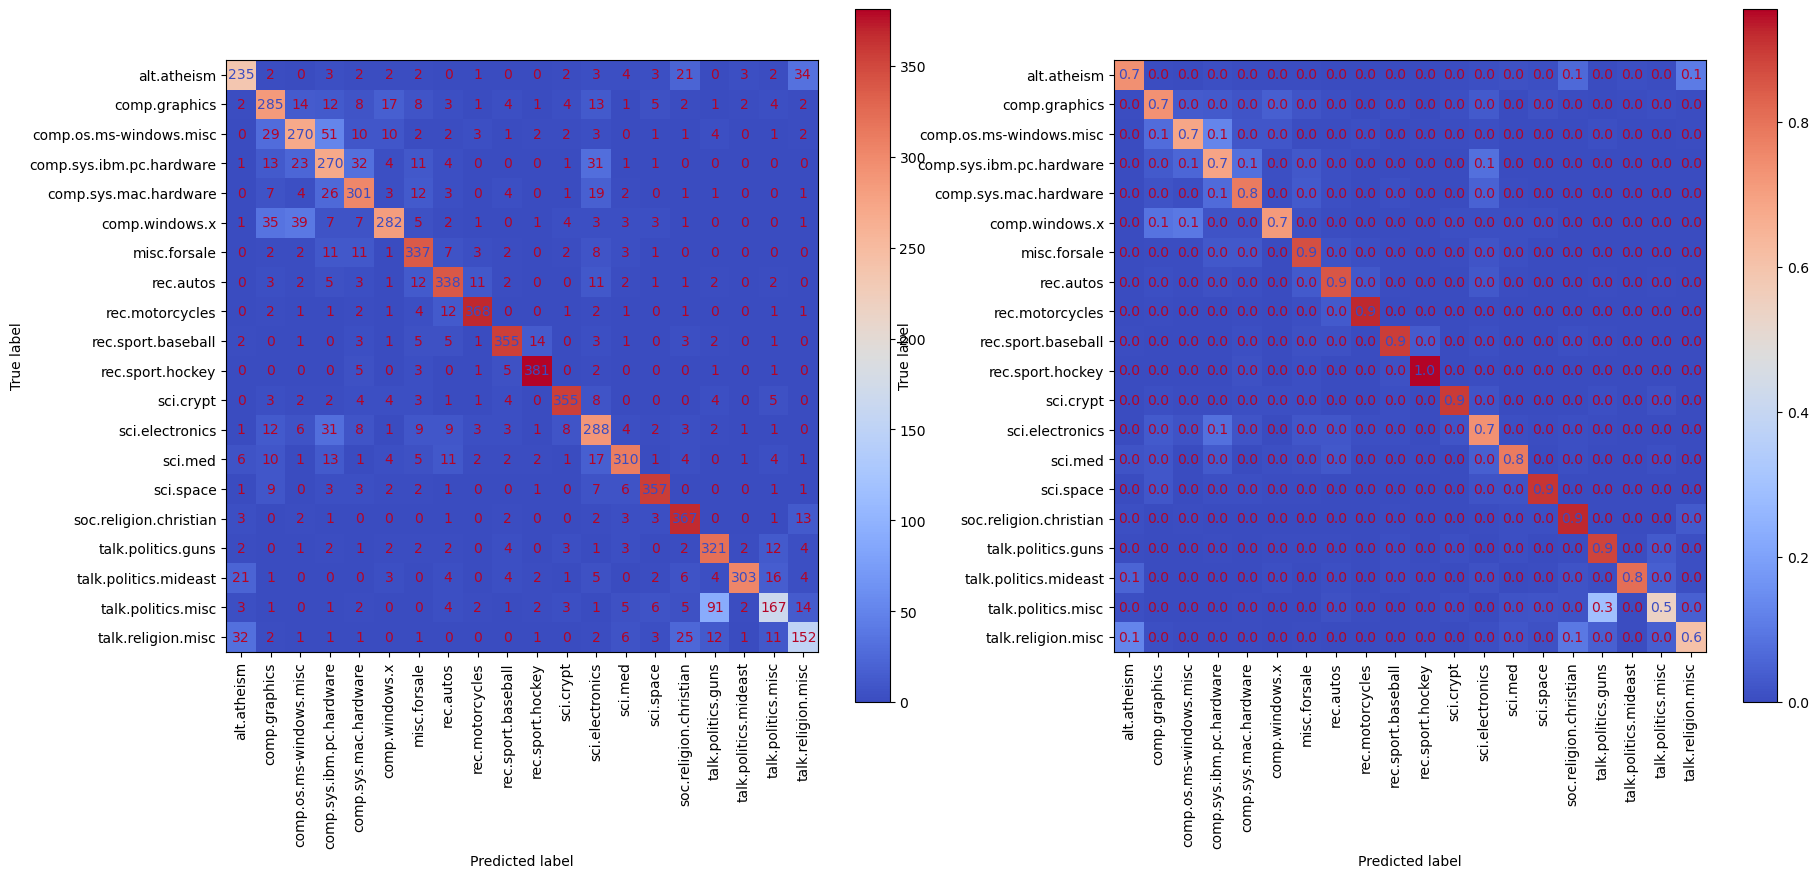

In [135]:
task_9(y_test, y_predict_grid)

### Вывод:
Чаще всего путаются следующие классы (по убыванию):
- talk.politics.misc и talk.politics.guns
- comp.windows.x и comp.graphics
- comp.windows.x и comp.os.ms-windwos.misc
- comps.os.ms-windows.misc и comp.graphics
- talk.religion.misc и alt.atheism
- talk.politics.mideeast и alt.atheism
- sci.electronics и comp.sys.mac.hardware


__Задание 10 (2.5 балла):__ Установите библиотеку XGBoost и обучите модель градиентного бустинга для решения поставленной задачи классификации. Попробуйте подобрать оптимальную модель, выбрав 2-3 важных параметра обучения. Укажите, какие параметры в большей, а какие - в меньшей степени оказали влияние на итоговое качество модели.

In [136]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [142]:
def task_10(X_train, X_test, y_train, y_test):
    model = XGBClassifier(n_estimators=2, max_depth=3)
    model.fit(X_train, y_train)
    
    y_pred_xgb = model.predict(X_test)
    print_metrics(model, y_pred_xgb, y_test)
    return model.predict(X_test)

In [138]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_encode = label_encoder.transform(y_train)
y_test_encode = label_encoder.transform(y_test)

In [139]:
# Я эту ячейку даже не буду пытаться запустить, т.к. это займет миллиард лет, я пытался.
def task_10_long(X_train, X_test, y_train, y_test):
    param_grid = {
        'n_estimators': [2, 4, 32, 128, 256],
        'learning_rate': [0.1, 0.5, 1]
    }

    grid_xgb = GridSearchCV(XGBClassifier(), param_grid=param_grid)
    grid_xgb.fit(X_train, y_train)
    y_pred_xgb = grid_xgb.best_estimator_.predict(X_test)
    print_metrics(grid_xgb.best_estimator_, y_pred_xgb, y_test)
    return y_pred_xgb

In [143]:
y_pred_xgb = task_10(X_train, X_test, y_train_encode, y_test_encode)

XGBClassifier {'objective': 'multi:softprob', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 2, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Accuracy       = 0.5947955390334573
Macro F1-score = 0.6223435114527467

__Задание 11 (3 балла):__ Часто в обработке текстов возникает задача выделения тем, обсуждаемых в них. Одним из способов решения это задачи является кластеризация графа совстречаемостей слов. Для текстов, находящихся в поле `pp_text` постройте словарь "слово" в "слово" в "счетчик совстречаемости", для слова A и B достаточно хранить A -> B -> counter, хранить B -> A -> counter не нужно. Счетчик увеличивается на 1, если пара слов встретилась в одном тексте внутри окна с длиной 10 слов.

In [151]:
def task_11(data, vocab):
    width = 10
    same_words = dict()

    for text in data["pp_text"]:
        for i, A in enumerate(text[:-1]):
            for B in text[i+1:i+width]:
                if not A in vocab or not B in vocab:
                    continue
                if A == B:
                    continue
                if same_words.get(A) is None:
                    same_words[A] = dict()
                if same_words[A].get(B) is None:
                    same_words[A][B] = {'counter': 1}
                else:
                    same_words[A][B]['counter'] += 1

    return same_words

In [152]:
same_words = task_11(data, vocabulary)

__Задание 12 (3 балла):__ Приняв каждое слово за вершину, а ребра между ними - за наличие совместной встречаемости, постройте граф совстречаемостей. Все ребра равнозначны, ребро добавляется между словами, если значение счетчика совместной встречамости этих слов выше заданного порога T. Примените к получившему графу алгоритм выделения сообществ greedy_modularity_communities из библиотеки NetworkX и напечайте получившиеся вообщества. Можно ли их как-то интерпретировать?

Пробуйте варьировать значение T от 70 до 120 и удалять слишком большие (и потому заведомо бесполезные) сообщества и сообщества из 1 слова.

In [153]:
import networkx as nx
from networkx import Graph
from networkx.algorithms import community

In [160]:
def filter_barrier(same_words, barrier=100):
    same_words_filtered = dict()

    for words, words_dict in same_words.items():
        same_words_filtered[words] = dict()
        for new_word, new_word_dict in words_dict.items():
            if new_word_dict['counter'] > barrier:
                same_words_filtered[words][new_word] = dict()
                same_words_filtered[words][new_word]['counter'] = same_words[words][new_word]['counter']
    return same_words_filtered

def task_12(same_words):
    for barrier in [70, 80, 90, 100, 110, 120]:
        same_words_filtered = filter_barrier(same_words, barrier)
        graph_words = Graph(same_words_filtered)
        communities = community.greedy_modularity_communities(graph_words)
        communities_filtered = [x for x in communities if 1 < len(x) < 100]
        print(f"Num {len(communities_filtered)} communitites with barrier = {barrier}:")
        for i, comm in enumerate(communities_filtered):
            if (i > 19):
                break
            print(f"Communities [{i+1}] = {set(comm)}")

In [161]:
task_12(same_words)

Num 140 communitites with barrier = 70:
Communities [1] = {'sahak', 'soul', 'today', 'company', 'union', 'rocket', 'special', 'armenian', 'serve', 'tavares', 'mountain', 'armenia', 'melkonian', 'investors', 'million', 'longer', 'speak', 'genocide', 'single', 'exists', 'passes', 'vos', 'view', 'closed', 'packet', 'proceeded', 'extermination', 'escape', 'roads', 'turks', 'ohanus', 'ways', 'soviet', 'turkish', 'appressian', 'cdt', 'write'}
Communities [2] = {'carter', 'views', 'relations', 'friend', 'failed', 'necessarily', 'difference', 'written', 'petaluma', 'disclaimers', 'cramer', 'uunet', 'expressed', 'employer', 'pyramid', 'standard', 'between', 'clayton', 'mine', 'user', 'disclaimer', 'opinions', 'interface', 'optilink'}
Communities [3] = {'stewart', 'war', 'civil', 'beings', 'human', 'gore', 'administration', 'gulf', 'conner', 'clinton', 'during', 'president', 'rights', 'okcforum', 'osrhe', 'bill'}
Communities [4] = {'serial', 'newsletter', 'page', 'large', 'medical', 'april', 'hi

### Вывод: 
Какого-то общего вывода сделать нельзя, но по каким-то сообществам можно заметить название города, которые имеют одинаковые приставку: 'san' - 'diego', 'jose', 'francisco'.

Ещё например 'brother', 'fine', 'big', 'deal', 'works', 'great' можно заметить какие-то слова из финансового сообщества.